In [1]:
from astropy.io import fits
from astropy.visualization import quantity_support
from os.path import join as jp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fits_path = '../fits'

pla = dict()
pla[2] = fits.open(jp(fits_path,'pla0002.mt'))
pla[3] = fits.open(jp(fits_path,'pla0003.mt'))

In [5]:
hdr = pla[3][0].header
hdr

SIMPLE  =                    T / Standard FITS format: NOST 100-2.0             
BITPIX  =                  -32 / No. of bits per pixel                          
NAXIS   =                    1 / No. of axes in image                           
NAXIS1  =                 1461 / No. of pixels                                  
EXTEND  =                    T / FITS extension may be present                  
COMMENT NOST 100-2.0: Hanisch,R. et al. 2001, Astron. & Astrophys. 376, 559     
                                                                                
CRPIX1  =                   1. / Reference pixel                                
CRVAL1  =                2200. / Coordinate at reference pixel                  
CDELT1  =                   5. / Coord. incr. per pixel (original value)        
CTYPE1  = '                '   / Units of coordinate                            
BUNIT   = '                '   / Units of data values                           
DATAMAX =       0.3159949779

In [6]:
n    = hdr['NAXIS1']
lo   = hdr['CRVAL1']
step = hdr['CDELT1']
lmb = np.arange(lo, lo + n * step, step)

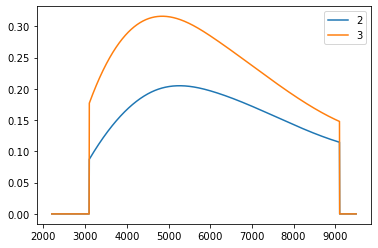

In [54]:
plt.plot(lmb, pla[2][0].data, label='2') # 5500
plt.plot(lmb, pla[3][0].data, label='3') # 6000
plt.legend()

In [56]:
from astropy.modeling.models import BlackBody as Planck
from astropy import units as u
from astropy.constants import b_wien

In [65]:
#T = (b_wien / (6000 * u.Angstrom)).to(u.K)
T = 5500 * u.K

In [66]:
planck5500 = Planck(T)

In [68]:
pl = planck5500(lmb * u.AA).to(u.erg / (u.Angstrom * u.s * u.sr * u.cm**2), equivalencies=u.spectral_density(lmb * u.Angstrom))

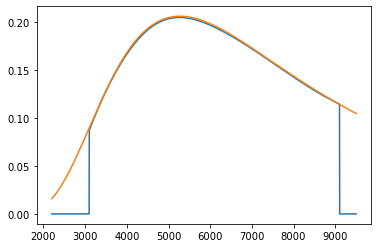

In [70]:
plt.plot(lmb, pla[2][0].data)
plt.plot(lmb, pl.value/1e7)

In [50]:
lm = planck6000.lambda_max

In [52]:
lm.to(u.Angstrom)

<Quantity 6000. Angstrom>